** Develop a machine learning model using a housing
dataset to predict house prices based on features
like square footage and number of bedrooms.
Preprocess the data to handle missing values and
scale numerical features. Train the model using
regression techniques such as Linear Regression or
Decision Trees. Evaluate its accuracy using metrics
like Mean Squared Error on test data to ensure
reliable predictions. This model aims to assist in
estimating house prices accurately for new
properties. **

** Name: Vedant Singh
Domain: Machine Learning Intern
Company: Future Intern
Task-03: House Pricing Prediction using Regression ML Algorithms such as Linear Regression, or Desicion Tree Regressor and deployement using flask and pickle

In [1]:
# import all necessary libraries -->
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load and read dataset -->
df = pd.read_csv('ParisHousing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
# STEP1: DATA PRE-PROCESSING --->
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.shape

(10000, 17)

In [6]:
for col in df.columns:
    print(col)

squareMeters
numberOfRooms
hasYard
hasPool
floors
cityCode
cityPartRange
numPrevOwners
made
isNewBuilt
hasStormProtector
basement
attic
garage
hasStorageRoom
hasGuestRoom
price


In [8]:
for col in df.columns:
    print(df[col].value_counts())
    print("*"*20)

squareMeters
47831    3
16006    3
36842    3
69665    3
68985    3
        ..
831      1
96352    1
76184    1
62328    1
59036    1
Name: count, Length: 9483, dtype: int64
********************
numberOfRooms
54    129
4     120
22    119
47    118
3     116
     ... 
6      85
31     84
34     84
40     82
9      75
Name: count, Length: 100, dtype: int64
********************
hasYard
1    5087
0    4913
Name: count, dtype: int64
********************
hasPool
0    5032
1    4968
Name: count, dtype: int64
********************
floors
97     126
55     122
77     117
28     116
3      116
      ... 
48      83
15      83
74      83
100     82
92      75
Name: count, Length: 100, dtype: int64
********************
cityCode
97260    3
95054    3
82521    3
56356    3
39297    3
        ..
90146    1
9439     1
36609    1
88278    1
18412    1
Name: count, Length: 9509, dtype: int64
********************
cityPartRange
8     1035
5     1031
10    1004
4     1001
3      999
9      997
1      994
2

In [9]:
# check for missing values --->
df.isnull().sum()                          # don't have missing/null values

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


In [10]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [11]:
df['numberOfRooms'].value_counts()

,count
numberOfRooms,
54,129
4,120
22,119
47,118
3,116
...,...
6,85
31,84
34,84


In [12]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [14]:
# drop unwanted columns --> DATA CLEANING
df.drop(columns=['hasYard','hasPool','cityPartRange','hasStormProtector','attic','garage'],inplace=True)
df.head()

,squareMeters,numberOfRooms,floors,cityCode,numPrevOwners,made,isNewBuilt,basement,hasStorageRoom,hasGuestRoom,price
0,75523,3,63,9373,8,2005,0,4313,0,7,7559081.5
1,80771,39,98,39381,6,2015,1,3653,1,2,8085989.5
2,55712,58,19,34457,8,2021,0,2937,1,9,5574642.1
3,32316,47,6,27939,4,2012,0,659,0,3,3232561.2
4,70429,19,90,38045,7,1990,1,8435,1,4,7055052.0


In [15]:
df.dtypes

,0
squareMeters,int64
numberOfRooms,int64
floors,int64
cityCode,int64
numPrevOwners,int64
made,int64
isNewBuilt,int64
basement,int64
hasStorageRoom,int64
hasGuestRoom,int64


In [17]:
df.isnull().sum()

,0
squareMeters,0
numberOfRooms,0
floors,0
cityCode,0
numPrevOwners,0
made,0
isNewBuilt,0
basement,0
hasStorageRoom,0
hasGuestRoom,0


In [18]:
df.shape

(10000, 11)

In [22]:
# find prices per sq_foot --->
df['pricePerSqFoot'] = df['price'] * 100000 / df['squareMeters']
df['pricePerSqFoot']

,pricePerSqFoot
0,1.000898e+07
1,1.001101e+07
2,1.000618e+07
3,1.000297e+07
4,1.001725e+07
...,...
9995,1.022166e+07
9996,1.001841e+07
9997,1.000707e+07
9998,1.000255e+07


In [24]:
df.describe()

,squareMeters,numberOfRooms,floors,cityCode,numPrevOwners,made,isNewBuilt,basement,hasStorageRoom,hasGuestRoom,price,pricePerSqFoot
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.521700,2005.48850,0.499100,5033.103900,0.503000,4.99460,4.993448e+06,1.004669e+07
std,28774.37535,28.816696,28.889171,29006.675799,2.856667,9.30809,0.500024,2876.729545,0.500016,3.17641,2.877424e+06,2.089565e+05
min,89.00000,1.000000,1.000000,3.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,0.00000,1.031350e+04,1.000046e+07
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,1997.00000,0.000000,2559.750000,0.000000,2.00000,2.516402e+06,1.000726e+07
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,2005.50000,0.000000,5092.500000,1.000000,5.00000,5.016180e+06,1.001301e+07
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,2014.00000,1.000000,7511.250000,1.000000,8.00000,7.469092e+06,1.002566e+07
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,2021.00000,1.000000,10000.000000,1.000000,10.00000,1.000677e+07,1.607851e+07


In [25]:
df.shape

(10000, 12)

In [27]:
df.head()

,squareMeters,numberOfRooms,floors,cityCode,numPrevOwners,made,isNewBuilt,basement,hasStorageRoom,hasGuestRoom,price,pricePerSqFoot
0,75523,3,63,9373,8,2005,0,4313,0,7,7559081.5,1.000898e+07
1,80771,39,98,39381,6,2015,1,3653,1,2,8085989.5,1.001101e+07
2,55712,58,19,34457,8,2021,0,2937,1,9,5574642.1,1.000618e+07
3,32316,47,6,27939,4,2012,0,659,0,3,3232561.2,1.000297e+07
4,70429,19,90,38045,7,1990,1,8435,1,4,7055052.0,1.001725e+07


In [28]:
df.drop(columns=['pricePerSqFoot'],inplace=True)
df.head()

,squareMeters,numberOfRooms,floors,cityCode,numPrevOwners,made,isNewBuilt,basement,hasStorageRoom,hasGuestRoom,price
0,75523,3,63,9373,8,2005,0,4313,0,7,7559081.5
1,80771,39,98,39381,6,2015,1,3653,1,2,8085989.5
2,55712,58,19,34457,8,2021,0,2937,1,9,5574642.1
3,32316,47,6,27939,4,2012,0,659,0,3,3232561.2
4,70429,19,90,38045,7,1990,1,8435,1,4,7055052.0


In [29]:
# save this as a final dataset --->
df.to_csv('final_dataset.csv',index=False)

In [30]:
# STEP2: DATA MODELLING ---> perform train-test split
X = df.drop(columns=['price'])
y = df['price']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(y_train.shape)

(8000, 10)
(8000,)


** IMPLEMENTED USING LINEAR REGRESSION ML ALGORITHM **

In [46]:
# firstly perform column transformation -->
col_trans = ColumnTransformer([('onehot', OneHotEncoder(), ['numberOfRooms'])], remainder='passthrough')

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# X being a feature matrix -->
scaler = StandardScaler(with_mean=False);
X_scaled = scaler.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_scaled, y_train)

LinearRegression()

In [51]:
# DATA PIPELINING ---> it will go to the column transformer put this data into scaler and then put into LR and then finally give us the output of it....
# create a list of tuples, where each tuple contains a name (string) and a transformer/estimator
pipe = Pipeline([('col_trans',col_trans), ('scaler', scaler), ('lr', lr)])

In [52]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['numberOfRooms'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('lr', LinearRegression())])

In [73]:
# make predictions on test data --> predicting the price that we get from training data
y_pred_lr = pipe.predict(X_test)

In [85]:
# model evaluation -->
mse = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2_lr *100}")

Mean Squared Error: 27924161.956265036
R-squared: 99.99968118575481



** IMPLEMENTED USING LASSO AND RIDGE REGRESSION ML ALGORITHM **

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
pipe = Pipeline([('col_trans',col_trans), ('scaler', scaler), ('lasso', lasso)])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['numberOfRooms'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('lasso', Lasso())])

In [75]:
# make price prediction on test data --->
y_pred_lasso = pipe.predict(X_test)

In [86]:
# model evaluation --->
mse = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2_lasso *100}")

Mean Squared Error: 27924161.956265036
R-squared: 99.99968118575481


In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge()
pipe = Pipeline([('col_trans',col_trans), ('scaler', scaler), ('ridge', ridge)])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['numberOfRooms'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [77]:
# make price prediction on test data --->
y_pred_ridge = pipe.predict(X_test)

In [87]:
# model evaluation --->
mse = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2_ridge *100}")

Mean Squared Error: 27924161.956265036
R-squared: 99.99968118575481


** IMPLEMENTED USING DECISION TREE REGRESSOR (DT) ML ALGORITHM **

In [70]:
from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor(max_depth=5,  min_samples_split=10, min_samples_leaf=4, max_features='sqrt', random_state=42)
dt = DecisionTreeRegressor()
pipe = Pipeline([('col_trans',col_trans), ('scaler', scaler), ('dt', dt)])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['numberOfRooms'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('dt', DecisionTreeRegressor())])

In [79]:
# make predictions on test data --->
y_pred_dt = pipe.predict(X_test)

In [88]:
# model evaluation -->
mse = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2_dt *100}")

Mean Squared Error: 27924161.956265036
R-squared: 99.99968118575481


In [81]:
# now compare the r2-score using visualisation of ML algorithms --->
print(r2_score(y_test, y_pred_lr)*100)
print(r2_score(y_test, y_pred_lasso)*100)
print(r2_score(y_test, y_pred_ridge)*100)

99.99968118575481
99.99968118575481
99.99968118575481


In [92]:
# accuracy comparison of all ml models -->
scores = [
    r2_lr*100,
    r2_lasso*100,
    r2_ridge*100,
    r2_dt*100
]

names = [
    'Linear Regression',
    'Lasso Regression',
    'Ridge Regression',
    'Decision Tree Regression'
]

df = pd.DataFrame({'Model': names, 'R2 Score': scores})
df.sort_values(by='R2 Score', ascending=False)
df

,Model,R2 Score
0,Linear Regression,99.999681
1,Lasso Regression,99.999681
2,Ridge Regression,99.999681
3,Decision Tree Regression,99.999681


<ipython-input-93-84ea3ccbe637>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=df, palette = 'rocket')


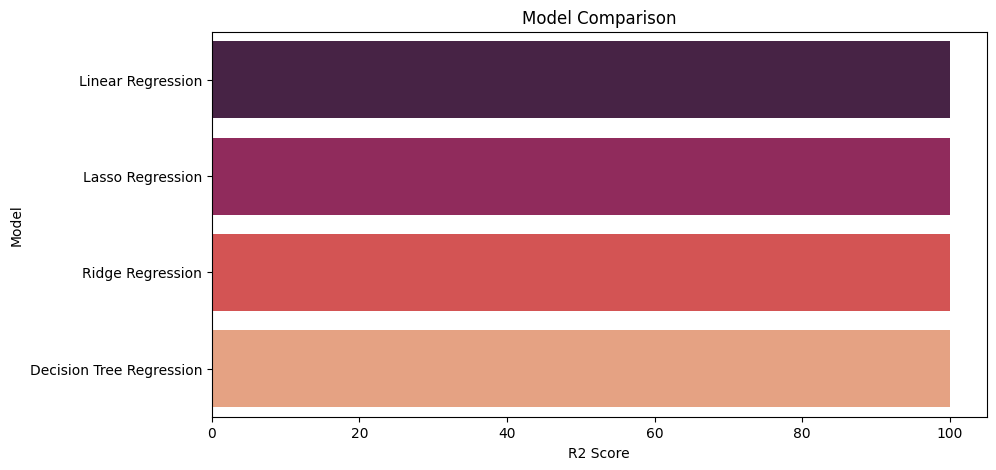

In [93]:
fig = plt.subplots(figsize=(10,5))
sns.barplot(x='R2 Score', y='Model', data=df, palette = 'rocket')
plt.title('Model Comparison')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

** NOW EXPORT OUR DATASET TO A WEB APPLICATION USING FLASK AND PICKLE LIBRARY **

In [98]:
import pickle

In [99]:
pickle = pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))            # save the model